# Práctica 1 - Self-Organising Maps
## Preparación de entorno
#### Importar librerías de código

In [ ]:
%reset
# from __future__ import division
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

In [2]:
#### Dataset que se va a utilizar para el entrenamiento

In [ ]:
# Código para obtener el Dataset que se va a usar en el entrenamiento

num_colores = 100
valor_min = 0
valor_max = 255
np.random.seed(10)
datos = np.random.randint(valor_min, valor_max, (num_colores, 3))

## SOM Setup
#### Variables definidas por el alumno

In [ ]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 30
periodo = 4000
learning_rate = 0.3
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [ ]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = datos.shape[1] # Accedemos a las columnas de datos; j
num_datos = datos.shape[0]    # Accedemos a las filas de datos; j

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = int(lado_mapa / 2)

def normalizar_min_max(datos):
    min_vals = np.min(datos, axis=0)  # Mínimo de cada canal [min_R, min_G, min_B]
    max_vals = np.max(datos, axis=0)  # Máximo de cada canal [max_R, max_G, max_B]
    return (datos - min_vals) / (max_vals - min_vals)  # Normaliza en rango [0,1]

# Función de ajuste de contraste usando sigmoide
def ajustar_contraste_sigmoide(datos, alpha=10):
    return 1 / (1 + np.exp(-alpha * (datos - 0.5)))  # Expande valores intermedios

# Normalizar y ajustar contraste si es necesario
if normalizar_datos:
    datos = normalizar_min_max(datos)  # Normalización mejorada
    datos = ajustar_contraste_sigmoide(datos)  # Ajuste de contraste


# Inicializar matriz de pesos aleatoria (valores entre 0 y 1)
matriz_pesos = np.random.random((lado_mapa, lado_mapa, num_entradas))



#### Funciones para entrenar/clasificar

In [ ]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def calcular_bmu(patron_entrada, m_pesos, m):
    # Inicializar la distancia mínima como infinito
    min_distancia = np.inf
    # Coordenadas de la BMU
    bmu_idx = (0, 0)
    
    # Iterar sobre todas las neuronas en la red
    for i in range(m_pesos.shape[0]):
        for j in range(m_pesos.shape[1]):
            # Calcular la distancia entre el patrón de entrada y el peso de la neurona actual
            distancia = np.linalg.norm(patron_entrada - m_pesos[i, j])
            # Si la distancia es menor que la mínima registrada hasta ahora, actualizar la BMU
            if distancia < min_distancia:
                min_distancia = distancia
                bmu = m_pesos[i, j]
                bmu_idx = (i, j)
    
    return bmu, bmu_idx

In [ ]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial * np.exp(-i / n_iteraciones)

In [ ]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    return max(1, vecindario_inicial * np.exp(-i / n_iteraciones))

In [ ]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2* (vecindario_actual**2)))

#### Funciones para dibujar la salida de la red

In [10]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    #ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()
    

## SOM Entrenamiento

iteracion número 0


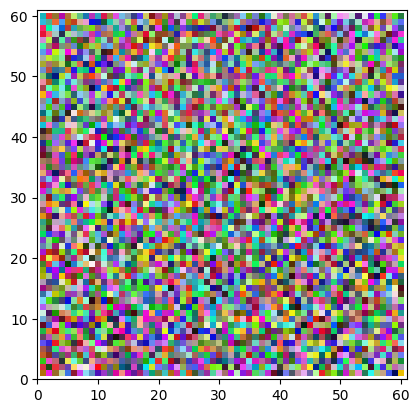

1
iteracion número 500


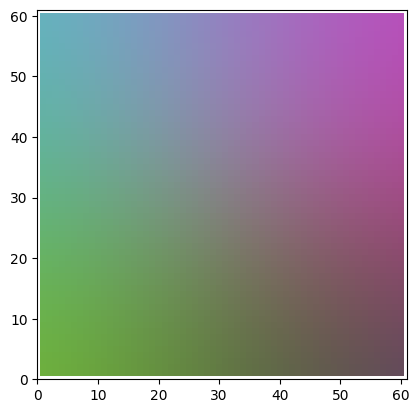

iteracion número 1000


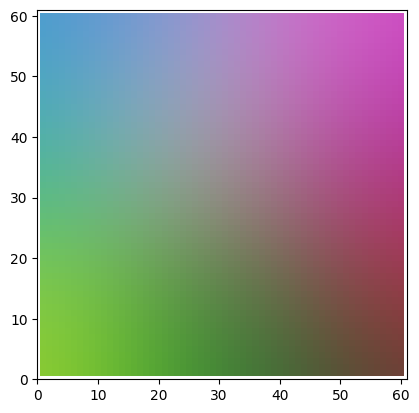

iteracion número 1500


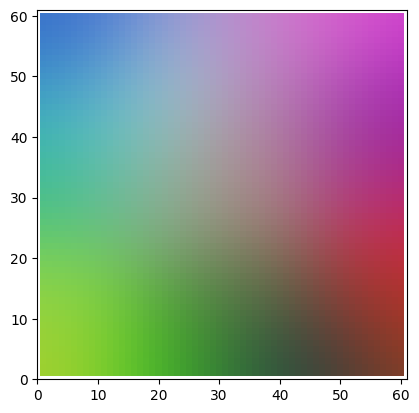

iteracion número 2000


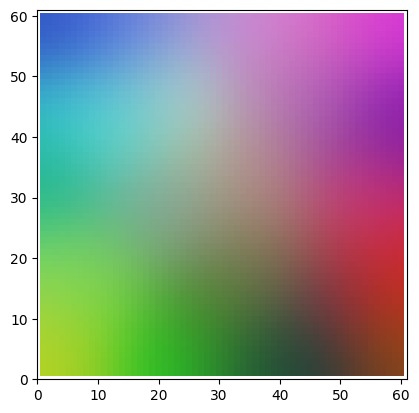

iteracion número 2500


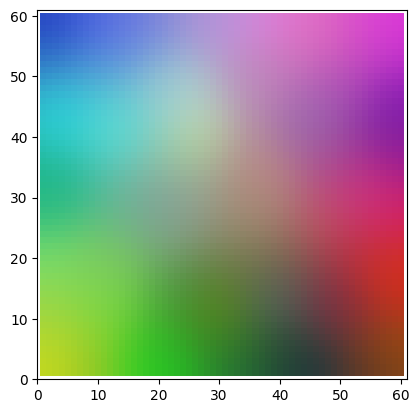

iteracion número 3000


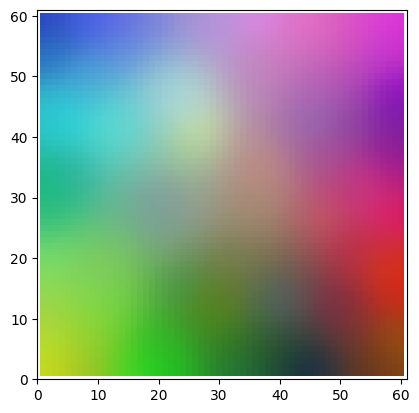

iteracion número 3500


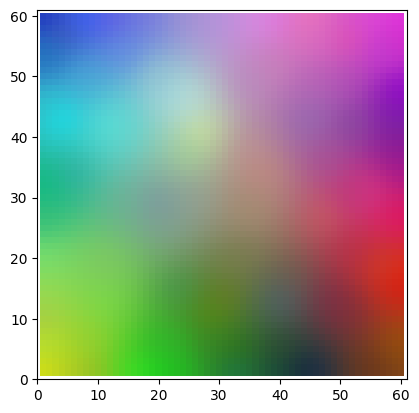

In [ ]:
# Entrena la red con el dataset de entrenamiento
for iteracion in range(periodo):
    # Seleccionar un patrón de entrada aleatorio
    patron = np.random.randint(0, num_datos)
    patron_entrada = datos[patron]

    # Encontrar la BMU y sus coordenadas
    bmu, bmu_idx = calcular_bmu(patron_entrada, matriz_pesos, (lado_mapa, lado_mapa))
    
    # Actualizar el coeficiente de aprendizaje y el vecindario
    learning_rate_actual = variacion_learning_rate(learning_rate, iteracion, periodo)
    vecindario_actual = variacion_vecindario(vecindario, iteracion, periodo)

    # Actualizar los pesos de la BMU y su vecindario
    for i in range(lado_mapa):
        for j in range(lado_mapa):
            distancia_BMU = np.linalg.norm(np.array([i, j]) - np.array(bmu_idx))
            amortiguacion = decay(distancia_BMU, vecindario_actual)
            matriz_pesos[i, j] += learning_rate_actual * amortiguacion * (patron_entrada - matriz_pesos[i, j])

    # Normalizar los pesos después de cada iteración si es necesario
    if normalizar_datos:
        matriz_pesos /= np.max(matriz_pesos)

    
    # Visualizar el mapa de Kohonen cada 100 iteraciones
    if iteracion % 100 == 0:
        print(f'iteracion número {iteracion}')
        pintar_mapa(matriz_pesos)
    if iteracion == 0:
        pintar_mapa(matriz_pesos)

# Visualizar el mapa de Kohonen al final del entrenamiento
print(f'Patron de entrada: {patron_entrada}')
pintar_mapa(matriz_pesos)


## SOM Clasificación

In [ ]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [ ]:
# Clasifica nuevos patrones

